Import All the Libraries

In [79]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Import Dataset

In [80]:
df = pd.read_csv(r"C:\Projects\ICT_Assignments\FinalProject\main_project-bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      14
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome     10
Target        0
dtype: int64

In [83]:
df.isnull().mean()

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000310
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000221
Target       0.000000
dtype: float64

In [84]:
# Examples of contact.
df['contact'].unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [87]:
df['poutcome'].unique()

array(['unknown', nan, 'failure', 'other', 'success'], dtype=object)

In [86]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [88]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

More InSights

In [89]:
# bucket boundaries
buckets = [0, 20, 40, 60, 1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df['Age_buckets_labels'] = pd.cut(
    df['age'], bins=buckets, labels=labels, include_lowest=True)

df['Age_buckets'] = pd.cut(df['age'], bins=buckets, include_lowest=True)
df['loan'] = np.where(df['loan'] =='yes', 1, 0)
mar =[0,1,2]

df['housing'] = np.where(df['housing'] =='yes', 1, 0)
df['marital'] = np.where(df['marital'] =='married', 0,np.where(df['marital'] =='single', 1,np.where(df['marital'] =='divorced', 2, -1)))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
0,58,management,0,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
1,44,technician,1,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
2,33,entrepreneur,0,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]"
3,47,blue-collar,0,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
4,33,unknown,1,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]"


In [90]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
45206,51,technician,0,tertiary,no,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes,40-60,"(40.0, 60.0]"
45207,71,retired,2,primary,no,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes,>60,"(60.0, 1000.0]"
45208,72,retired,0,secondary,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes,>60,"(60.0, 1000.0]"
45209,57,blue-collar,0,secondary,no,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no,40-60,"(40.0, 60.0]"
45210,37,entrepreneur,0,secondary,no,2971,0,0,cellular,17,nov,361,2,188,11,other,no,20-40,"(20.0, 40.0]"


In [91]:
df.groupby('Age_buckets_labels')['age'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: age, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

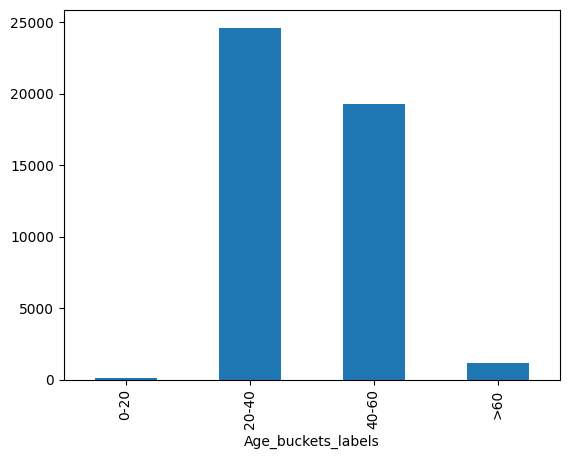

In [92]:
df.groupby('Age_buckets_labels')['age'].count().plot.bar()

First Insight- Maximum number of rows in the Dataset comes between 20-40 age 

In [93]:
df.groupby('Age_buckets_labels')['loan'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: loan, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

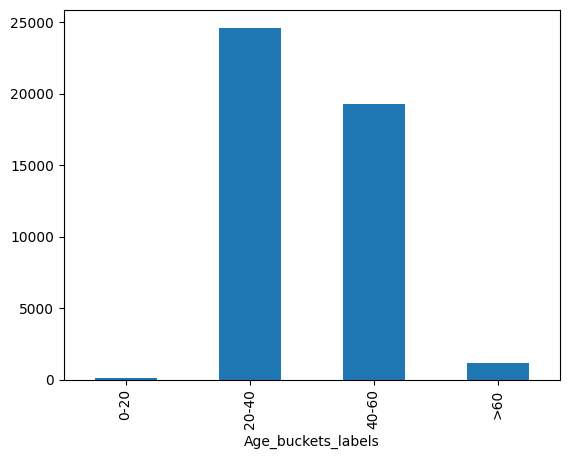

In [94]:
df.groupby('Age_buckets_labels')['loan'].count().plot.bar()

In [95]:
df.groupby('Age_buckets_labels')['housing'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: housing, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

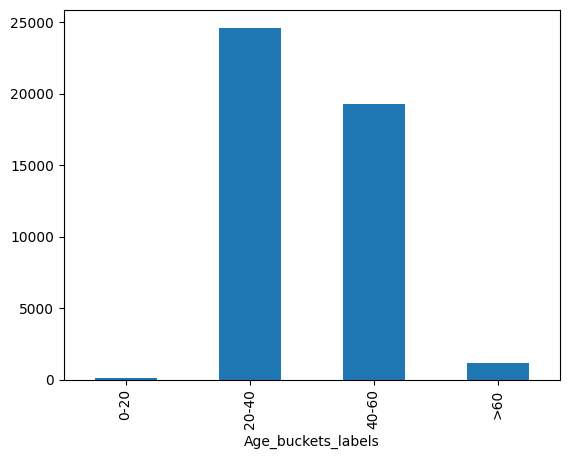

In [96]:
df.groupby('Age_buckets_labels')['housing'].count().plot.bar()

In [57]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

<AxesSubplot: xlabel='job'>

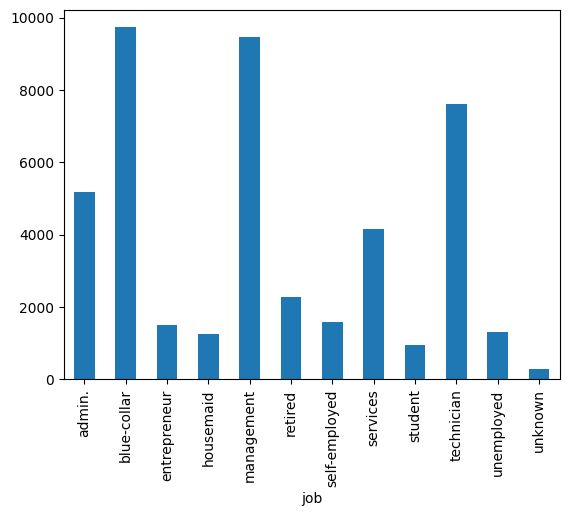

In [97]:
df.groupby('job')['housing'].count().plot.bar()

In [58]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

<AxesSubplot: xlabel='job'>

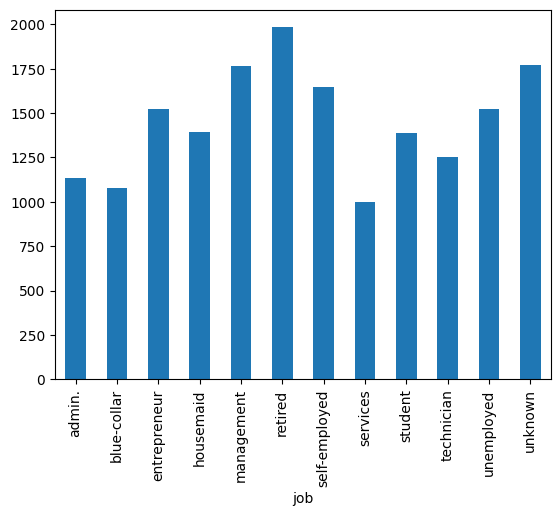

In [98]:
df.groupby('job')['balance'].mean().plot.bar()

<AxesSubplot: >

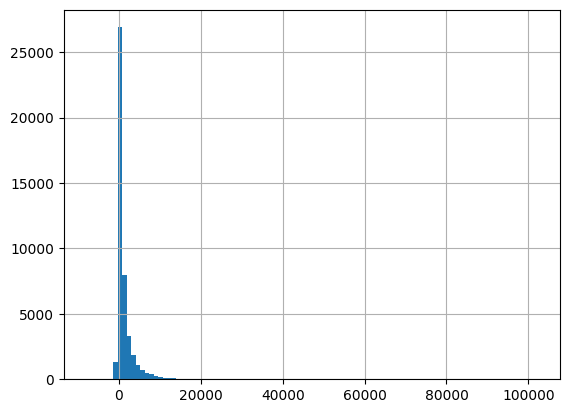

In [99]:
df['balance'].hist(bins=100)

<AxesSubplot: >

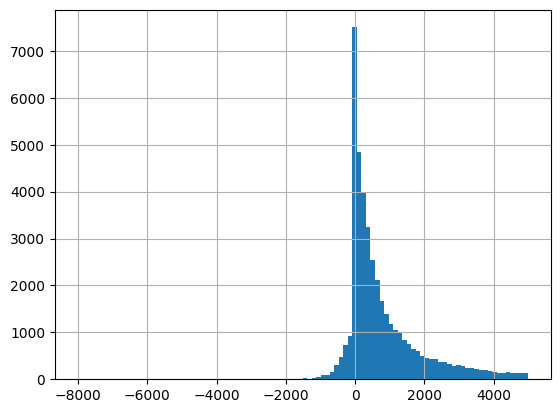

In [100]:
# and now let's look at the lower balance in more detail

df[df['balance']<5000]['balance'].hist(bins=100)

<AxesSubplot: >

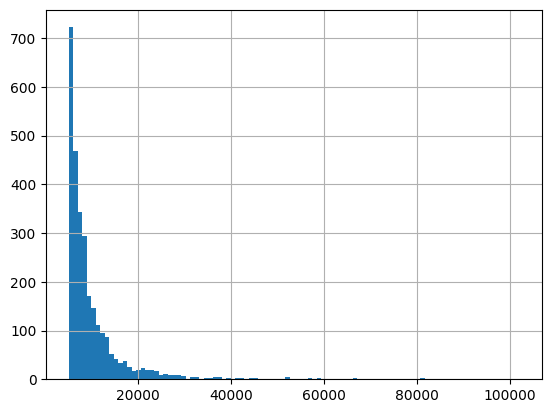

In [101]:
df[df['balance']>5000]['balance'].hist(bins=100)

In [102]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [-10000,0, 5000, 10000, 15000, 20000,150000]

# bucket labels
labels = ['<0','0-5k', '5-10k', '10-15k', '15-20k', '>20k']

# discretisation
df['balance_buckets'] = pd.cut(
    df['balance'], bins=buckets, labels=labels, include_lowest=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
0,58,management,0,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
1,44,technician,1,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
2,33,entrepreneur,0,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]",0-5k
3,47,blue-collar,0,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
4,33,unknown,1,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]",0-5k


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<0'),
  Text(1, 0, '0-5k'),
  Text(2, 0, '5-10k'),
  Text(3, 0, '10-15k'),
  Text(4, 0, '15-20k'),
  Text(5, 0, '>20k')])

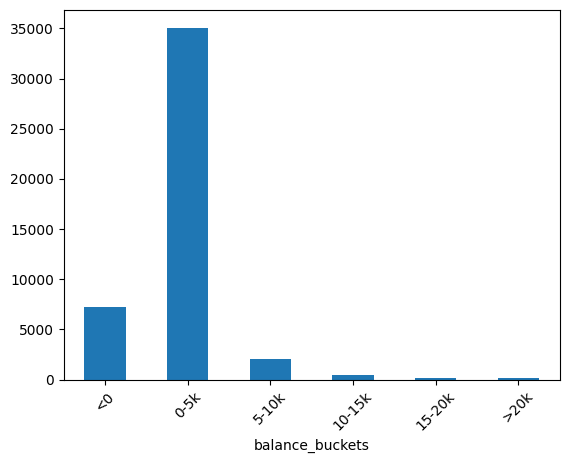

In [103]:
df.groupby(['balance_buckets'])['balance'].count().plot.bar()
plt.xticks(rotation=45)

In [104]:
df.groupby(['balance_buckets'])['balance'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: balance, dtype: int64

In [107]:
df.groupby(['marital']).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
marital,,,,,,,,,,,,,,,,,,,
0,27214,27214,27214,27214,27214,27214,27214,27204,27214,27214,27214,27214,27214,27214,27209,27214,27214,27214,27214
1,12790,12790,12790,12790,12790,12790,12790,12787,12790,12790,12790,12790,12790,12790,12786,12790,12790,12790,12790
2,5207,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207


<AxesSubplot: xlabel='marital'>

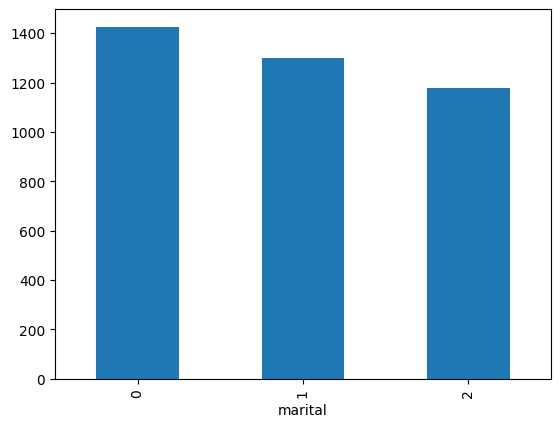

In [115]:
df.groupby(['marital'])['balance'].mean().plot.bar()